In [1]:
# Importing the pandas library enables the CSV to be read and data analysis/manipulation to take place

import pandas as pd

In [4]:
data = pd.read_csv('hotel_bookings.csv')
data_filtr = data[data['is_canceled'] == 0]    # Provides a point at which data without cancelled bookings can be accessed  

In [18]:
data_filtr_ = data_filtr[['adr', 'arrival_date_year']].dropna()

In [22]:
data_filtr_['adr'].groupby(data_filtr_['arrival_date_year']).namean().round(2)

AttributeError: 'SeriesGroupBy' object has no attribute 'namean'

In [5]:
# Calculating the mean ADR, excluding canceled bookings

mean_adr_by_yr = data_filtr['adr'].groupby(data_filtr['arrival_date_year']).mean().round(2)
mean_adr_by_yr

arrival_date_year
2015.0     88.70
2016.0     96.53
2017.0    111.31
Name: adr, dtype: float64

In [6]:
# Calculating the total nights booked per year, excluding canceled bookings

total_wknd_nights_booked_by_yr = data_filtr['stays_in_weekend_nights'].groupby(data_filtr['arrival_date_year']).sum()
total_wk_nights_booked_by_yr = data_filtr['stays_in_week_nights'].groupby(data_filtr['arrival_date_year']).sum()
total_nights_booked_by_yr = total_wknd_nights_booked_by_yr + total_wk_nights_booked_by_yr
total_nights_booked_by_yr

arrival_date_year
2015.0     48256
2016.0    119693
2017.0     86919
dtype: int64

In [7]:
# Calculating the total revenue for each year

total_rev_by_booking = (data_filtr['stays_in_weekend_nights'] + data_filtr['stays_in_week_nights']) * data_filtr['adr']
total_rev_by_yr = total_rev_by_booking.groupby(data_filtr['arrival_date_year']).sum()
scaled_total_rev_by_yr = total_rev_by_yr / 1000   # Used to scale the revenue down so that the data points on the scatter plots do not take up the entire figure
total_rev_by_yr

arrival_date_year
2015.0     4506594.36
2016.0    11665878.78
2017.0     9807563.77
dtype: float64

In [8]:
import matplotlib.pyplot as plt

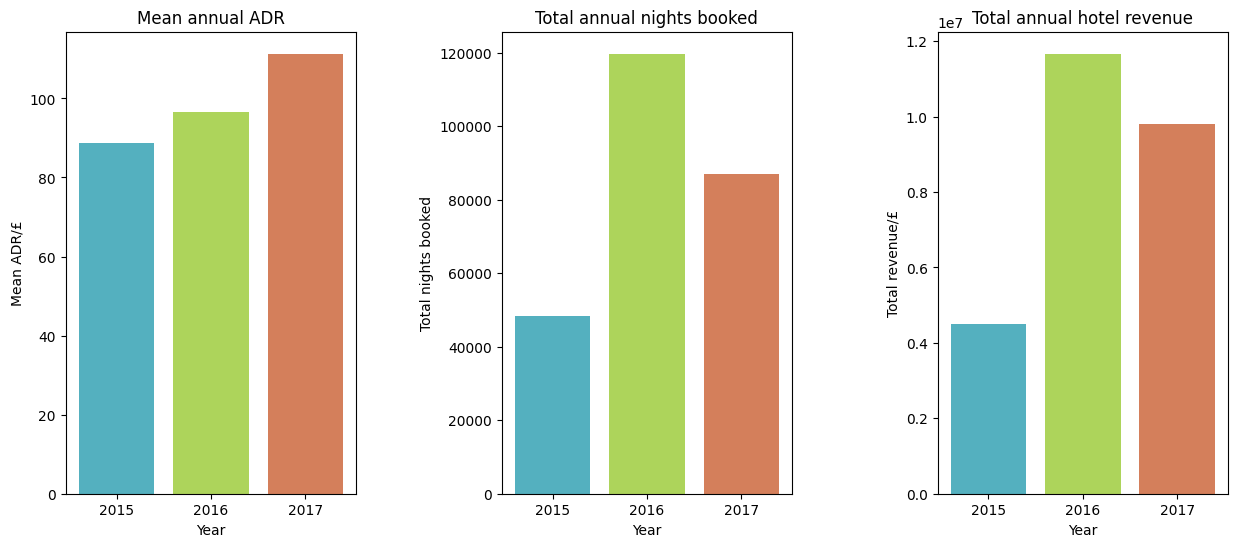

In [9]:
# Plotting the above data that will be used in the final scatter graph

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))  # Creates empty canvases of 1 by 3 subplots 

axes[0].bar(mean_adr_by_yr.index, mean_adr_by_yr, color = ('#54b0bf', '#add45b', '#d47f5b'))
axes[0].set_title('Mean annual ADR')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean ADR/£')

axes[1].bar(total_nights_booked_by_yr.index, total_nights_booked_by_yr, color = ('#54b0bf', '#add45b', '#d47f5b'))
axes[1].set_title('Total annual nights booked')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total nights booked')

axes[2].bar(total_rev_by_yr.index, total_rev_by_yr, color = ('#54b0bf', '#add45b', '#d47f5b'))
axes[2].set_title('Total annual hotel revenue')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Total revenue/£')

plt.subplots_adjust(wspace = 0.5)    # Prevents the graphs from overlapping each other

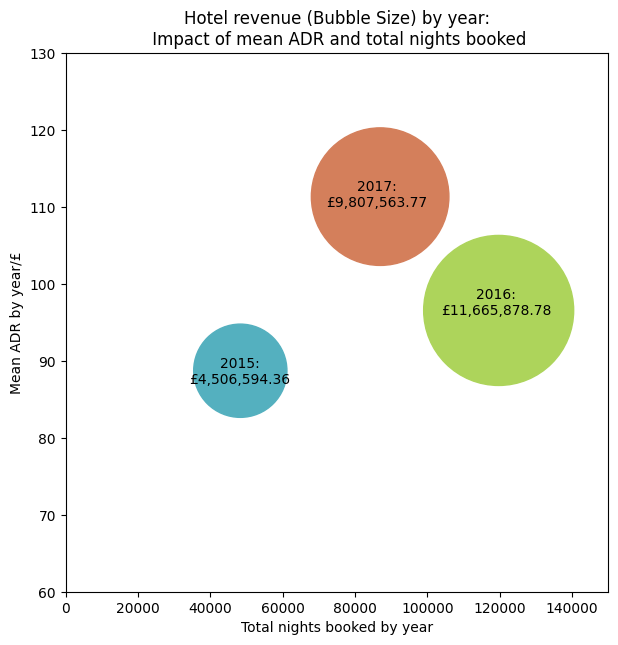

In [10]:
# Plotting the final scatter graph

plt.figure(figsize = (7, 7))
plt.scatter(total_nights_booked_by_yr, mean_adr_by_yr, s = scaled_total_rev_by_yr, 
            color = ('#54b0bf', '#add45b', '#d47f5b'))
plt.xlabel('Total nights booked by year')
plt.ylabel('Mean ADR by year/£')
plt.title('Hotel revenue (Bubble Size) by year:\n Impact of mean ADR and total nights booked')
plt.xlim(0, 150000)
plt.ylim(60,130);
plt.text(48100, 87, '2015:\n£4,506,594.36', ha = 'center' )
plt.text(119000, 96, '2016:\n£11,665,878.78', ha = 'center')
plt.text(86000, 110, '2017:\n£9,807,563.77', ha = 'center');

In which year did the hotel generate the highest total revenue; and how is this revenue affected by the relationship between mean ADR and total nights booked? 

 

Maximising revenue is key to a company’s success, allowing financial stability and directly impacting overall profits. In the case of the hotel, the price per night and quantity demanded are represented by the mean ADR as well as the total nights booked, respectively. By analysing the relationship between these two variables, and the resulting revenue, the hotel will be able to revenue maximise. From the constructed scatter graph, price strategies can be formed: if the price is too low, as seen in 2015, the good may be assumed to be low quality, resulting in low demand and therefore the lowest overall revenue of £4,506,594.36. If the price is too high, as highlighted in 2017, there will be a resultant fall in the quantity demanded (respective to 2016) as consumer budgets are exceeded. It can therefore be deduced that the revenue maximising price falls between the 2015 and 2017 price values of £88.70 and £111.31. With the information provided, the hotel will be able to vary its price between these two values and assess whether a positive outcome has been achieved (the total revenue generated is larger than the 2016 value of £11,665,878.78). 

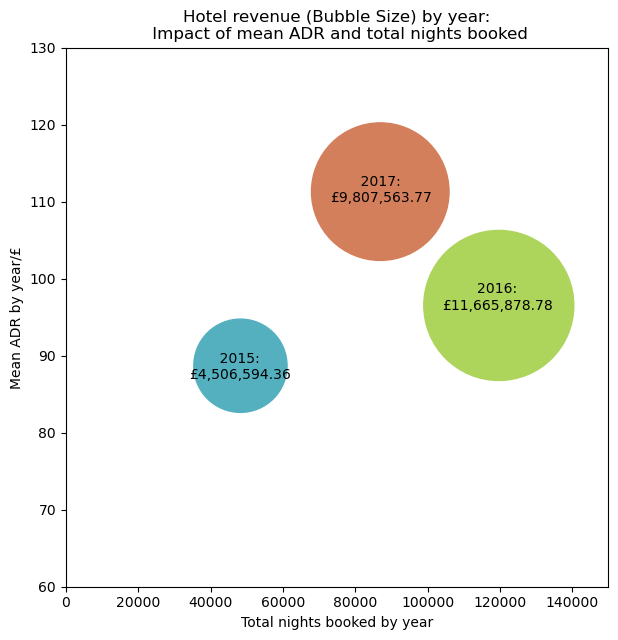

Overall mark: 60

#### Business Question
A relevant business question is stated with the reason why it is important to the hotel industry for profit maximization. The findings and business insights concluded from data is overall demonstrated in a logical way. However, the question is straightforward to answer, which limit more comprehensive use of data, as the total revenue itself is defined by ADR times the number of bookings. Moreover, ADR and number of bookings can be fundamentally affected by seasonality.

<u> Good </u>

#### Data
Two key attributes are effectively selected to ansewr the proposed question. But the rationale of choosing the attributes can be presented more clearly. The total revenue, ADR and the number of bookings seem the same thing but from three different aspects. Consider to look for more fundamental attributes that influence ADR and the number of bookings. Data filtering and grouping shows good understanding of how to process data.

<u> Good </u>

#### Visualization
Visualizations are clearly presented. The choice of bar plots and a bubble plot effectively convey the key findings from data. Titles, axis lables and necessary annotations are provided. For better readability, consider to use log-transformation when the numbers are very large, for example the total nights booked in your case.

<u> Very good </u>

#### Code
The code is overall nicely structured and easy to follow. Comments are given where necessary. However, there is a minor issue for the code importing the data file. The use of pd.read_csv('hotel_bookings') is incorrect. You should type the exact file name with the format suffix every time you import a file.

<u> Good </u>